# CS 105 Project Phase 2

Our objective is to assess how the impeachment trial of Donald Trump has affected support of Democratic candidates and the President as he heads towards re-election. We will look at polling data from before, during, and after the impeachment trials and plot trends according to different groupings such as region (social group), age, gender, economic group, and political orientation. After analyzing this data, we will make predictions for each group and who they want to be voted into office for the 2020 election in November.

Visual requirements:

"You must include a histogram, at least two scatter plots or a pair-wise
scatter plot, a parallel coordinates plot, and a box-plot. If a plot is not applicable in your case,
then note that and include a different plot."

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
def read(file_name):
    df_temp3 = pd.read_csv(file_name)
    list(df_temp3.iloc[1, :])
    arrays = [['All', 'All', 'Gender', 
                        'Gender', 'Age', 'Age', 
                        'Age', 'Age', '<50/50+',
                        '<50/50+', 'Race', 'Race',
                        'Race', 'Race', 'Race',
                        'Race', 'Class', 'Class',
                        'Class', 'Class', 'White X Class',
                        'White X Class', 'Paycheck', 'Paycheck',
                        'Paycheck', 'Paycheck', 'Paycheck',
                        'Party Affiliation', 'Party Affiliation', 'Party Affiliation',
                        'Ideology', 'Ideology', 'Ideology',
                        'Ideology', 'Ideology', '2016 Vote', '2016 Vote',
                        'Education', 'Education', 'Education',
                        'Income', 'Income', 'Income',
                        'Marital Status', 'Marital Status', 'Marital Status',
                        'Child < 18', 'Child < 18', 'Single Parent',
                        'Single Parent', 'Religion', 'Religion',
                        'Religion', 'Religion', 'Attend Religious Service',
                        'Attend Religious Service', 'Attend Religious Service', 'Evangelical',
                        'Evangelical', 'Aborition', 'Abortion',
                        'Abortion', 'Union HH', 'Union HH',
                        'Military HH', 'Military HH', 'LGBTQ HH',
                        'LGBTQ HH', 'Urbanicity', 'Urbanicity',
                        'Urbanicity', 'Suburban', 'Suburban',
                        'Region', 'Region', 'Region',
                        'Region'],list(df_temp3.iloc[0, :])]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
    df_temp3 = pd.DataFrame(df_temp3.to_numpy(), columns=index)
    df_temp3 = df_temp3.drop(0)
    return df_temp3


## FiveThirtyEight

National polling data of who is leading in the Democratic primary election, last updated February 29, 2020

In [2]:
primary_df = pd.read_csv("president_primary_polls.csv")
primary_df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Sanders,13257,Bernard Sanders,34.1
1,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Warren,13258,Elizabeth Warren,14.0
2,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,14.0
3,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Bloomberg,13289,Michael Bloomberg,11.7
4,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Buttigieg,13345,Pete Buttigieg,8.8


We only need the latest poll data so we need to get the data with the last poll_id:

In [3]:
primary_latest = primary_df.set_index("poll_id").loc[64627]
primary_latest 

,question_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
poll_id,,,,,,,,,,,,,,,,,,,,,
64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Sanders,13257,Bernard Sanders,34.1
64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Warren,13258,Elizabeth Warren,14.0
64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,14.0
64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Bloomberg,13289,Michael Bloomberg,11.7
64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Buttigieg,13345,Pete Buttigieg,8.8
64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Klobuchar,13310,Amy Klobuchar,3.3
64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Steyer,13327,Tom Steyer,2.5
64627,119292,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Gabbard,13343,Tulsi Gabbard,1.0
64627,119293,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,Point Blank Political,...,False,2/29/20 09:28,head-to-head poll,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Sanders,13257,Bernard Sanders,49.6


In [4]:

d_primary_table = (primary_latest.groupby(["poll_id", "candidate_id", "candidate_name"]).pct.mean())

d_primary_table.to_frame()

pct
poll_id candidate_id candidate_name            
64627   13256        Joseph R. Biden Jr.  26.95
        13257        Bernard Sanders      46.60
        13258        Elizabeth Warren     24.80
        13289        Michael Bloomberg    21.95
        13310        Amy Klobuchar         3.30
        13327        Tom Steyer            2.50
        13343        Tulsi Gabbard         1.00
        13345        Pete Buttigieg        8.80

Visualizing with a scatter plot who is leading in the polls as of the latest data: (could only graph with the candidate_id for now)

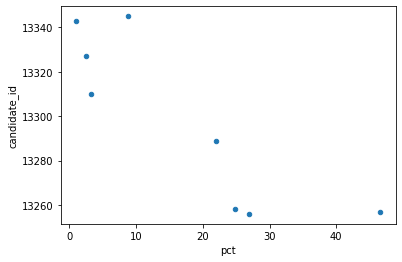

In [5]:
d_primary_df = d_primary_table.reset_index()
d_primary_df.plot(kind='scatter', x='pct', y='candidate_id')
plt.show()

National polling data of who is leading in the general primary election, last updated February 29, 2020

In [6]:
general_df = pd.read_csv("president_polls.csv")
general_df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,ranked_choice_reallocated,created_at,notes,url,stage,answer,candidate_name,candidate_party,pct
0,119270,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Sanders,Bernard Sanders,DEM,42.4
1,119270,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Trump,Donald Trump,REP,48.2
2,119271,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Warren,Elizabeth Warren,DEM,40.7
3,119271,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Trump,Donald Trump,REP,49.2
4,119272,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Biden,Joseph R. Biden Jr.,DEM,41.8


In [7]:
general_election = (general_df.groupby(["poll_id", "state", "candidate_name"]).pct.mean())
general_election.to_frame()

pct
poll_id state    candidate_name            
57026   Ohio     Bernard Sanders      47.00
                 Donald Trump         45.25
                 Elizabeth Warren     43.00
                 Joseph R. Biden Jr.  48.00
                 Sherrod Brown        48.00
...                                     ...
64628   Missouri Donald Trump         52.00
                 Elizabeth Warren     35.00
                 Joseph R. Biden Jr.  42.00
                 Michael Bloomberg    39.00
                 Pete Buttigieg       37.00

[1087 rows x 1 columns]

National polling data of presidental approval/disapproval rate, last updated February 27, 2020

In [8]:
approval_df = pd.read_csv("president_approval_polls.csv")
approval_df.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,119194,64608,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/25/20,2/27/20,NaN,True,2/28/20 09:27,NaN,http://www.rasmussenreports.com/public_content...,538,47.0,52.0
1,119031,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,42.0,53.0
2,119032,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,43.0,55.0
3,119075,64583,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/24/20,2/26/20,NaN,True,2/27/20 09:26,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0
4,119267,64591,2020.0,NaN,Donald Trump,590,Fox News/Beacon Research/Shaw & Co. Research,NaN,NaN,Fox News,...,2/23/20,2/26/20,NaN,NaN,2/28/20 18:00,NaN,https://www.scribd.com/document/449414637/Fox-...,538,47.0,52.0


Visualizing President Trump's current approval rating in a histogram: 

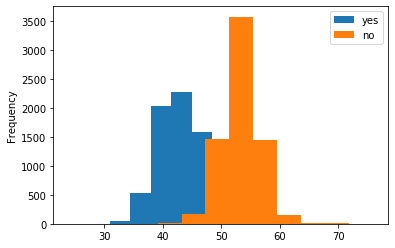

In [9]:
approval_df.yes.plot.hist(legend=True)
approval_df.no.plot.hist(legend=True)

## SurveyUSA

Data to be added below

In [14]:
survey1_df = read("surveyusa1/survey_data/survey_5.csv")
survey1_df

first                                                     All Gender         \
second                          Credibility Interval:     All   Male Female   
1                                           Joe Biden\t   168     92     76   
2                                      Bernie Sanders\t   113     57     55   
3                                    Elizabeth Warren\t   113     48     65   
4                                      Pete Buttigieg\t    43     22     21   
5                                        Mike Bloomberg    34     14     20   
6                                         Andrew Yang\t    22     15      7   
7                                            Tom Steyer    21      7     14   
8                                         Tulsi Gabbard    14      8      6   
9                                         Amy Klobuchar    10      3      7   
10                                  Some Other Democrat     1      1      0   
11                                            Undecided    25     10     16   
12                                                Total   565    278    288   
13      Composition of Likely Democratic Primary Voters  100%    49%    51%   

first    Age                  <50/50+       ... LGBTQ HH Urbanicity           \
second 18-34 35-49 50-64  65+   18-49  50+  ...       No      Urban Suburban   
1         20    33    56   59      53  115  ...      150         60       92   
2         34    31    23   25      65   48  ...       99         53       53   
3         22    42    27   21      65   48  ...       96         47       57   
4          5    10    15   13      15   28  ...       24         13       27   
5          4    11    15    5      15   19  ...       27         18       16   
6         11     3     6    1      14    8  ...       20          9       13   
7          6     4     3    8      10   11  ...       18         11        9   
8          3     2     8    1       5    9  ...       13          4        5   
9          1     2     6    1       3    7  ...        9          4        7   
10         0     1     0    0       1    0  ...        1          0        1   
11         1     2    12    9       4   22  ...       21          8       14   
12       107   143   172  143     250  315  ...      479        227      294   
13       19%   25%   30%  25%     44%  56%  ...      85%        40%      52%   

first        Suburban          Region                             
second Rural     Male Female Central  Greater  Inland E Bay Area  
1         17       41     51       32       76       39       21  
2          7       24     29       15       61       16       22  
3          8       19     39       20       43       28       21  
4          3       15     12        5       20        7       10  
5          0        4     12        6       12        9        7  
6          0       10      4        1        8        7        7  
7          1        4      5        2       10        3        6  
8          5        3      2        3        6        1        4  
9          0        2      5        2        1        2        5  
10         0        1      0        1        0        0        0  
11         3        5      9        9        9        4        3  
12        44      127    167       96      247      116      106  
13        8%      22%    30%      17%      44%      21%      19%  

[13 rows x 77 columns]

In [16]:
df_gender = survey1_df.All
df_gender

second,All
1,168
2,113
3,113
4,43
5,34
6,22
7,21
8,14
9,10
10,1
